In [1]:
%matplotlib inline

import datetime

import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
import plotly.offline as py
from neuralprophet import NeuralProphet
from fbprophet.plot import plot_plotly

In [2]:
def parser(x):
    return datetime.datetime.strptime('190'+x, '%Y-%m')

In [3]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv

--2021-04-25 17:29:47--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519 [text/plain]
Saving to: ‘shampoo.csv.2’

shampoo.csv.2       100%[===================>]     519  --.-KB/s    in 0s      

2021-04-25 17:29:47 (13.1 MB/s) - ‘shampoo.csv.2’ saved [519/519]



In [4]:
df_data = pd.read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

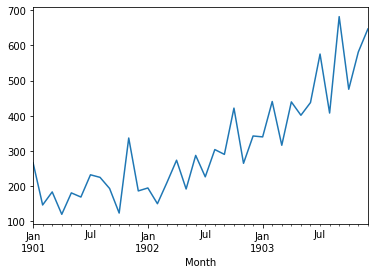

In [5]:
df_data.plot()
plt.show()

In [6]:
df_data.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

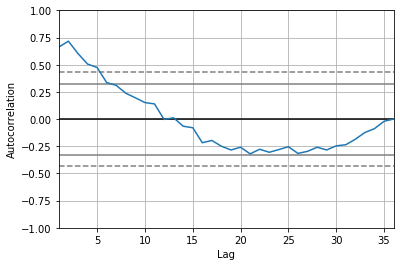

In [7]:
autocorrelation_plot(df_data)
plt.show()

#### Prophet Model  

In [8]:
y = df_data

ds = df_data.index.to_series() 

df_prophet_series = pd.concat([ds, y], axis=1)
df_prophet_series = df_prophet_series.rename(columns={"Month": "ds", "Sales": "y"})
df_prophet_series

,ds,y
Month,,
1901-01-01,1901-01-01,266.0
1901-02-01,1901-02-01,145.9
1901-03-01,1901-03-01,183.1
1901-04-01,1901-04-01,119.3
1901-05-01,1901-05-01,180.3
1901-06-01,1901-06-01,168.5
1901-07-01,1901-07-01,231.8
1901-08-01,1901-08-01,224.5
1901-09-01,1901-09-01,192.8


In [9]:
# Adding US holidays
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

INFO: nprophet.utils - set_auto_seasonalities: Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 695


  0%|          | 0/100 [00:00<?, ?it/s]

0


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 5.34E-01
Epoch[695/695]: 100%|██████████| 695/695 [00:16<00:00, 41.17it/s, SmoothL1Loss=0.024, MAE=38.3, RegLoss=0] 
INFO: nprophet.utils - set_auto_seasonalities: Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 666


  0%|          | 0/100 [00:00<?, ?it/s]

predicted=355.467163, expected=342.300000
1


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.23E-01
Epoch[666/666]: 100%|██████████| 666/666 [00:16<00:00, 39.21it/s, SmoothL1Loss=0.0161, MAE=36.2, RegLoss=0]
INFO: nprophet.utils - set_auto_seasonalities: Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 640


  0%|          | 0/100 [00:00<?, ?it/s]

predicted=409.571991, expected=339.700000
2


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 4.33E-01
Epoch[640/640]: 100%|██████████| 640/640 [00:19<00:00, 33.35it/s, SmoothL1Loss=0.00965, MAE=27.3, RegLoss=0]
INFO: nprophet.utils - set_auto_seasonalities: Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 615


  0%|          | 0/100 [00:00<?, ?it/s]

predicted=306.107117, expected=440.400000
3


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E-01
Epoch[615/615]: 100%|██████████| 615/615 [00:18<00:00, 33.29it/s, SmoothL1Loss=0.00866, MAE=26.7, RegLoss=0]
INFO: nprophet.utils - set_auto_seasonalities: Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 592


  0%|          | 0/100 [00:00<?, ?it/s]

predicted=367.123718, expected=315.900000
4


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.87E-02
Epoch[592/592]: 100%|██████████| 592/592 [00:19<00:00, 30.97it/s, SmoothL1Loss=0.00824, MAE=25.9, RegLoss=0]
INFO: nprophet.utils - set_auto_seasonalities: Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 571


  0%|          | 0/100 [00:00<?, ?it/s]

predicted=463.838745, expected=439.300000
5


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.52E-05
Epoch[571/571]: 100%|██████████| 571/571 [00:17<00:00, 32.10it/s, SmoothL1Loss=1.6, MAE=782, RegLoss=0] 
INFO: nprophet.utils - set_auto_seasonalities: Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 551


  0%|          | 0/100 [00:00<?, ?it/s]

predicted=146.762512, expected=401.300000
6


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.52E-01
Epoch[551/551]: 100%|██████████| 551/551 [00:19<00:00, 28.98it/s, SmoothL1Loss=0.00448, MAE=25.1, RegLoss=0]
INFO: nprophet.utils - set_auto_seasonalities: Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 533


  0%|          | 0/100 [00:00<?, ?it/s]

predicted=536.912048, expected=437.400000
7


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.52E-02
Epoch[533/533]: 100%|██████████| 533/533 [00:17<00:00, 29.70it/s, SmoothL1Loss=0.00453, MAE=28, RegLoss=0]  
INFO: nprophet.utils - set_auto_seasonalities: Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 516


  0%|          | 0/100 [00:00<?, ?it/s]

predicted=419.652252, expected=575.500000
8


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.87E-05
Epoch[516/516]: 100%|██████████| 516/516 [00:17<00:00, 29.73it/s, SmoothL1Loss=0.803, MAE=480, RegLoss=0]
INFO: nprophet.utils - set_auto_seasonalities: Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 500


  0%|          | 0/100 [00:00<?, ?it/s]

predicted=709.436157, expected=407.600000
9


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E-01
Epoch[500/500]: 100%|██████████| 500/500 [00:17<00:00, 29.11it/s, SmoothL1Loss=0.0074, MAE=37.6, RegLoss=0] 
INFO: nprophet.utils - set_auto_seasonalities: Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 484


  0%|          | 0/100 [00:00<?, ?it/s]

predicted=453.943512, expected=682.000000
10


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.52E-01
Epoch[484/484]: 100%|██████████| 484/484 [00:18<00:00, 26.41it/s, SmoothL1Loss=0.00857, MAE=42.5, RegLoss=0]
INFO: nprophet.utils - set_auto_seasonalities: Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 470


  0%|          | 0/100 [00:00<?, ?it/s]

predicted=602.051147, expected=475.300000
11


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 4.33E-01
Epoch[470/470]: 100%|██████████| 470/470 [00:17<00:00, 27.11it/s, SmoothL1Loss=0.00899, MAE=43.8, RegLoss=0]
INFO: nprophet.utils - set_auto_seasonalities: Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 457


  0%|          | 0/100 [00:00<?, ?it/s]

predicted=579.779297, expected=581.300000
12


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.31E-01
Epoch[457/457]: 100%|██████████| 457/457 [00:17<00:00, 26.31it/s, SmoothL1Loss=0.0071, MAE=42.4, RegLoss=0] 


predicted=555.513062, expected=646.900000
Test MSE: 22525.472
Test MAE: 119.426


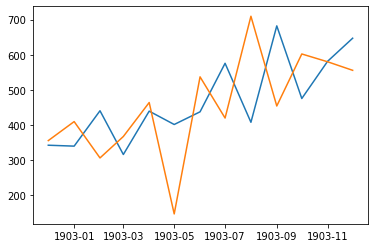

In [15]:
size = int(len(df_prophet_series) * 0.66)
train, test = df_prophet_series[0:size], df_prophet_series[size:len(df_prophet_series)]
predictions = list()

history = train

for t in range(len(test)):
    print (t)
    #m = Prophet(n_changepoints=10, daily_seasonality=True, changepoint_prior_scale=0.08)
    #m = Prophet(n_changepoints=12, changepoint_prior_scale=0.68, holidays=holidays, daily_seasonality=True, weekly_seasonality=False, yearly_seasonality=False)
    m = NeuralProphet()
    m.add_country_holidays(country_name='US')
    #m.add_seasonality(name='yearly', period=365, fourier_order=1)
    m.fit(history, freq="MS")
    
    future = m.make_future_dataframe(history, periods=1)
    output = m.predict(future)
    
    yhat = output['yhat1']
    predictions.append(np.float(yhat.tail(1)))
    obs = test[t:t+1]
    history = pd.concat([history,obs],axis=0)
    
    print('predicted=%f, expected=%f' % (np.float(yhat.tail(1)), np.float(obs['y'])))
    
mse_error = mean_squared_error(test['y'].astype(float), predictions)
mae_error = mean_absolute_error(test['y'].astype(float), predictions)

print('Test MSE: %.3f' % mse_error)
print('Test MAE: %.3f' % mae_error)


df_predictions = test
df_predictions = pd.concat([df_predictions, pd.Series(predictions, index = test.index)], axis=1)
df_predictions = df_predictions.rename(columns={0: 'yhat'})

# plot
plt.plot(df_predictions.ds, df_predictions.y)
plt.plot(df_predictions.ds, df_predictions.yhat)
plt.show()

In [22]:
# Fit the model with yearly seasonality
m = NeuralProphet(n_changepoints=12, daily_seasonality=True, weekly_seasonality=False, yearly_seasonality=False)
m.add_country_holidays(country_name='US')

m.fit(df_prophet_series, freq="MS")


INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 444


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 3.51E-01
Epoch[444/444]: 100%|██████████| 444/444 [00:16<00:00, 26.70it/s, SmoothL1Loss=0.00503, MAE=44.8, RegLoss=0]


,SmoothL1Loss,MAE,RegLoss
0,0.393175,437.768762,0.0
1,0.116332,235.541278,0.0
2,0.058787,160.213554,0.0
3,0.039778,118.800887,0.0
4,0.043968,141.429212,0.0
...,...,...,...
439,0.005034,44.839660,0.0
440,0.005036,44.762270,0.0
441,0.005030,44.765394,0.0
442,0.005033,44.789838,0.0


In [24]:
# Generate montly future data, starting at the first day of the month (MS = "Month Start")
future = m.make_future_dataframe(df_prophet_series, periods=12)
future.tail()


,ds,y,t,y_scaled
7,1904-08-01,None,1.229323,NaN
8,1904-09-01,None,1.258459,NaN
9,1904-10-01,None,1.286654,NaN
10,1904-11-01,None,1.315789,NaN
11,1904-12-01,None,1.343985,NaN


In [28]:
# Check our forecast upper and lower bounds 
forecast = m.predict(future)
forecast[['ds', 'yhat1']].tail()

,ds,yhat1
7,1904-08-01,834.933716
8,1904-09-01,862.163147
9,1904-10-01,888.514160
10,1904-11-01,915.743591
11,1904-12-01,942.094788


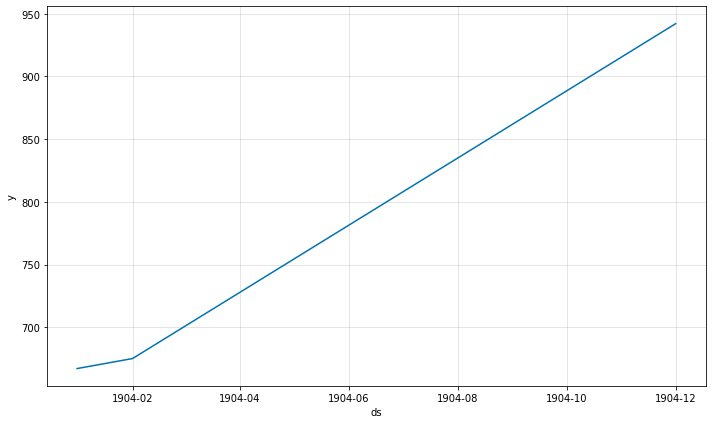

In [29]:
# Plot forecast interval

fig1 = m.plot(forecast)

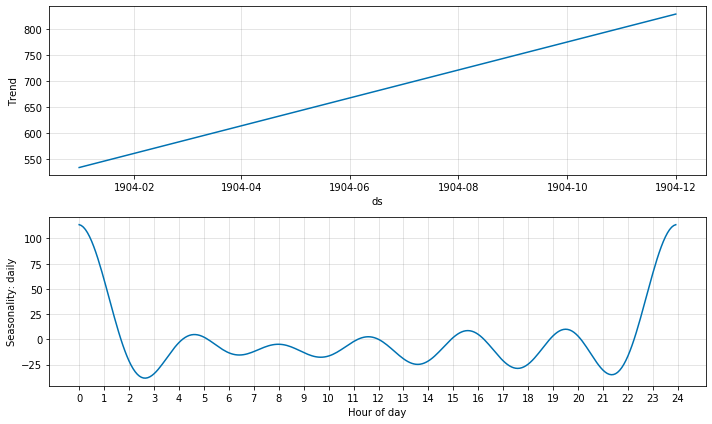

In [30]:
# Plot trends

fig2 = m.plot_components(forecast)

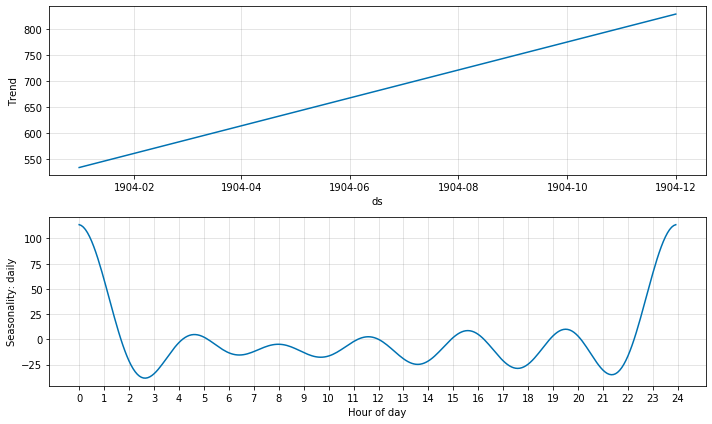

In [31]:
m.plot_components(forecast).savefig('Sahmpoo_sales_components_Prophet.png');